### Corona Virus Data Analyst 8 March 2020

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.

Resources : WHO

This data analysis is focused on data wrangling, data cleaning and data visulization of Corona Virus on 8th March 2020.

The dataset is derived from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE. 

Here is the link consisting of all datased regarding Coronavirus

https://github.com/CSSEGISandData/COVID-19

1 - Determine which libraries is used for dataset

In [15]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2 - Load data from csv file defined in the repository with UTF-8 encoding

In [16]:
# Loading the data 
corona_data_df = pd.read_csv('03-08-2020.csv',encoding = "utf-8")

3 - Get first 5 values from dataframe whose name is corona_data_df

In [17]:
corona_data_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-08T14:43:03,67707,2986,45235,30.9756,112.2707
1,NaN,Italy,2020-03-08T18:03:04,7375,366,622,43.0000,12.0000
2,NaN,South Korea,2020-03-08T12:53:03,7314,50,118,36.0000,128.0000
3,NaN,Iran,2020-03-08T11:03:30,6566,194,2134,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-08T14:43:03,1352,7,1256,23.3417,113.4244


4 - Get last 5 values from corona_data_df dataframe

In [18]:
corona_data_df.tail()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
250,Northern Territory,Australia,2020-03-06T04:33:03,0,0,0,-12.4634,130.8456
251,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0,0,0,29.3829,-98.6134
252,"Montgomery County, TX",US,2020-03-07T19:53:02,0,0,0,30.3213,-95.4778
253,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0,0,0,41.2545,-95.9758
254,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0,0,0,38.2721,-121.9399


5 - Show descriptive statistics of corona_data_df dataframe

In [19]:
corona_data_df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,255.00000,255.000000,255.000000,255.000000,255.000000
mean,430.72549,14.913725,238.019608,32.777938,-13.082458
std,4302.71234,188.609605,2838.177099,19.209053,88.840827
min,0.00000,0.000000,0.000000,-41.454500,-157.858400
25%,1.00000,0.000000,0.000000,29.105600,-86.842100
50%,4.00000,0.000000,0.000000,37.601700,-8.000000
75%,35.50000,0.000000,1.000000,42.859400,55.500000
max,67707.00000,2986.000000,45235.000000,64.963100,174.886000


6 - Determine how many rows and columns there are in corona_data_df dataframe

In [20]:
corona_data_df_count_row = corona_data_df.shape[0]  # gives number of row count
corona_data_df_count_col = corona_data_df.shape[1]  # gives number of col count
print("Corona Dataset : {} rows and {} columns "
      .format(corona_data_df_count_row,corona_data_df_count_col))

Corona Dataset : 255 rows and 8 columns 


7 - Show data type of each column in corona_data_df dataframe

In [21]:
corona_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 8 columns):
Province/State    155 non-null object
Country/Region    255 non-null object
Last Update       255 non-null object
Confirmed         255 non-null int64
Deaths            255 non-null int64
Recovered         255 non-null int64
Latitude          255 non-null float64
Longitude         255 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 16.0+ KB


8 - Determine how many null values there are in corona_data_df dataframe

In [22]:
pd.isna(corona_data_df).sum()

Province/State    100
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64

9 - Define a dataframe based on showing all values related with Mainland China

In [23]:
corona_data_mainland_china_df = corona_data_df[corona_data_df["Country/Region"] == "Mainland China"]

10 - Get first 5 values from dataframe whose name is corona_data_mainland_china_df

In [24]:
corona_data_mainland_china_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-08T14:43:03,67707,2986,45235,30.9756,112.2707
4,Guangdong,Mainland China,2020-03-08T14:43:03,1352,7,1256,23.3417,113.4244
5,Henan,Mainland China,2020-03-08T05:03:02,1272,22,1247,33.8820,113.6140
6,Zhejiang,Mainland China,2020-03-08T09:03:04,1215,1,1161,29.1832,120.0934
9,Hunan,Mainland China,2020-03-08T12:53:03,1018,4,968,27.6104,111.7088


11 - Get values deriving from Province/State, Confirmed from corona_data_mainland_china_df

In [25]:
corona_data_mainland_china_confirmed_df = corona_data_mainland_china_df[["Province/State","Confirmed"]]

12 - Get values deriving from Province/State, Deaths from corona_data_mainland_china_df

In [26]:
corona_data_mainland_china_death_df = corona_data_mainland_china_df[["Province/State","Deaths"]]

13 - Get values deriving from Province/State, Recovered from corona_data_mainland_china_df

In [27]:
corona_data_mainland_china_rocovered_df = corona_data_mainland_china_df[["Province/State","Recovered"]]

14 - Show a figure regarding how many people have been confirmed from Corona Virus in Mainland China

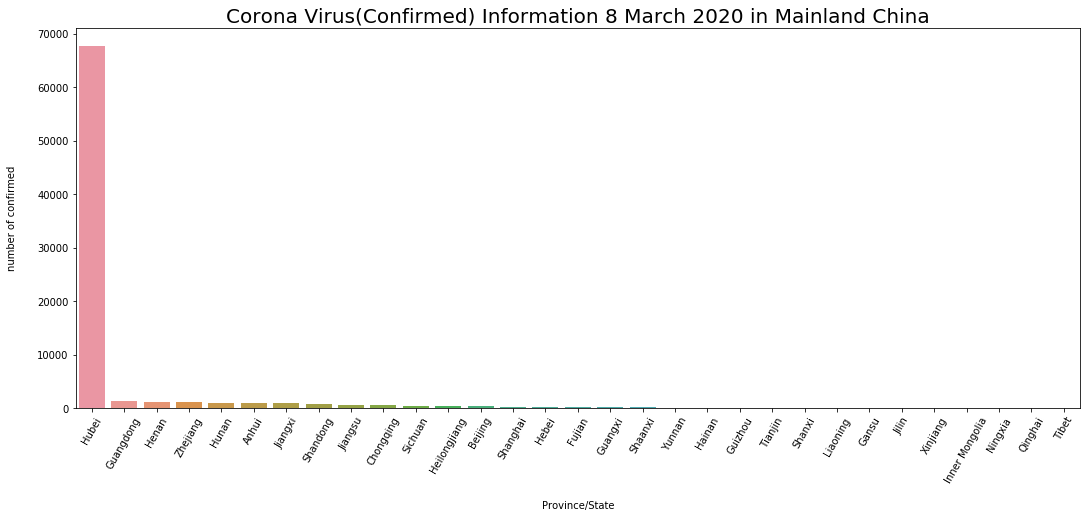

In [28]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Confirmed" ,data = corona_data_mainland_china_confirmed_df )
plt.title('Corona Virus(Confirmed) Information 8 March 2020 in Mainland China', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('08-03-2020/image1.png')
plt.savefig('08-03-2020/image1.pdf')

15 - Because the number of people confirmed as Corona Virus in the city of Hubei are extraordinary in the previos figure shown above, Show a figure regarding how many people have been confirmed from Corona Virus in Mainland China except for the city of Hubei 

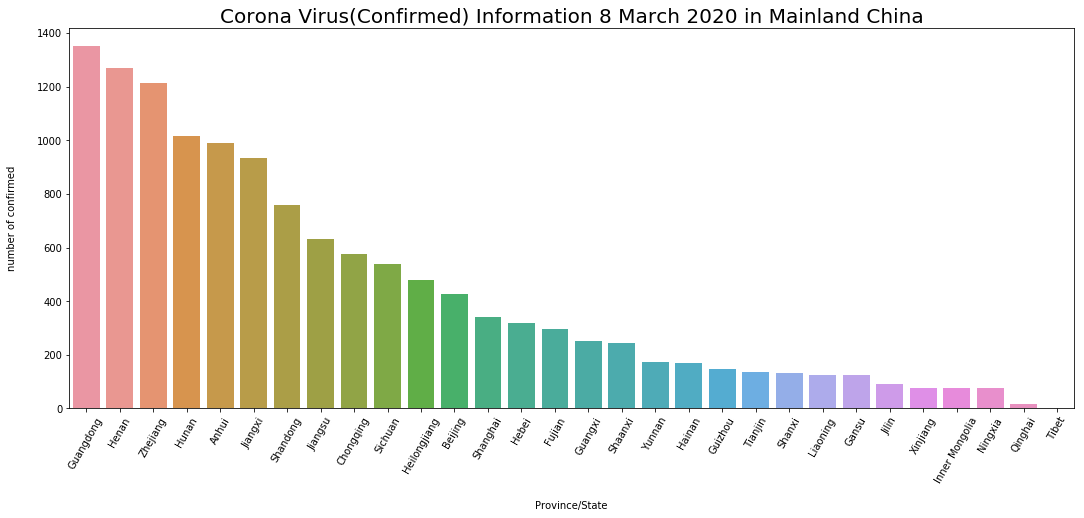

In [29]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Confirmed" ,
            data = corona_data_mainland_china_confirmed_df[corona_data_mainland_china_confirmed_df["Province/State"] != "Hubei"] )
plt.title('Corona Virus(Confirmed) Information 8 March 2020 in Mainland China', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('08-03-2020/image2.png')
plt.savefig('08-03-2020/image2.pdf')

16 - Show a figure regarding how many people were dead from Corona Virus in Mainland China

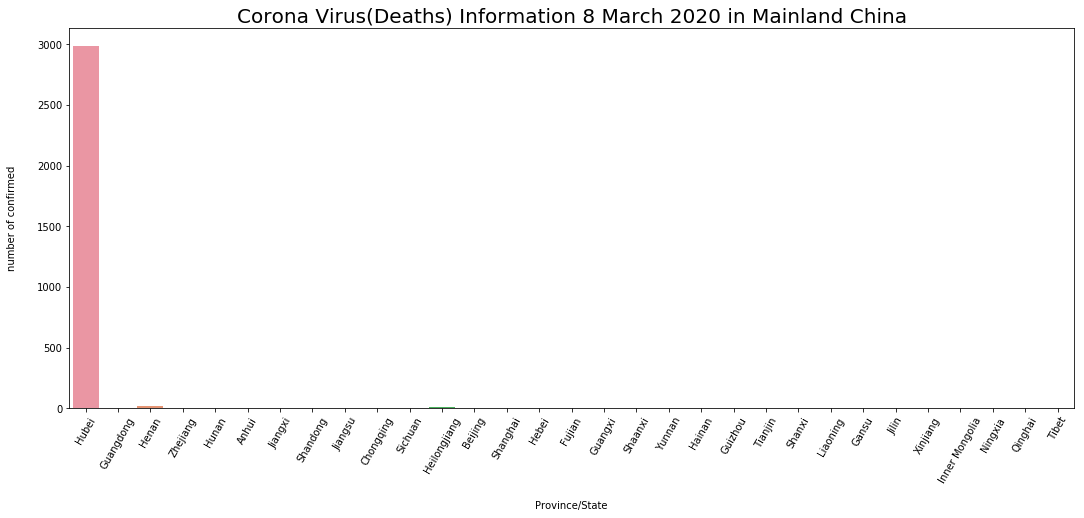

In [30]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Deaths" ,data = corona_data_mainland_china_death_df )
plt.title('Corona Virus(Deaths) Information 8 March 2020 in Mainland China', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('08-03-2020/image3.png')
plt.savefig('08-03-2020/image3.pdf')

17 - Because the number of dead people in the city of Hubei are extraordinary in the previos figure shown above, Show a figure regarding how many people were dead from Corona Virus in Mainland China except for the city of Hubei 

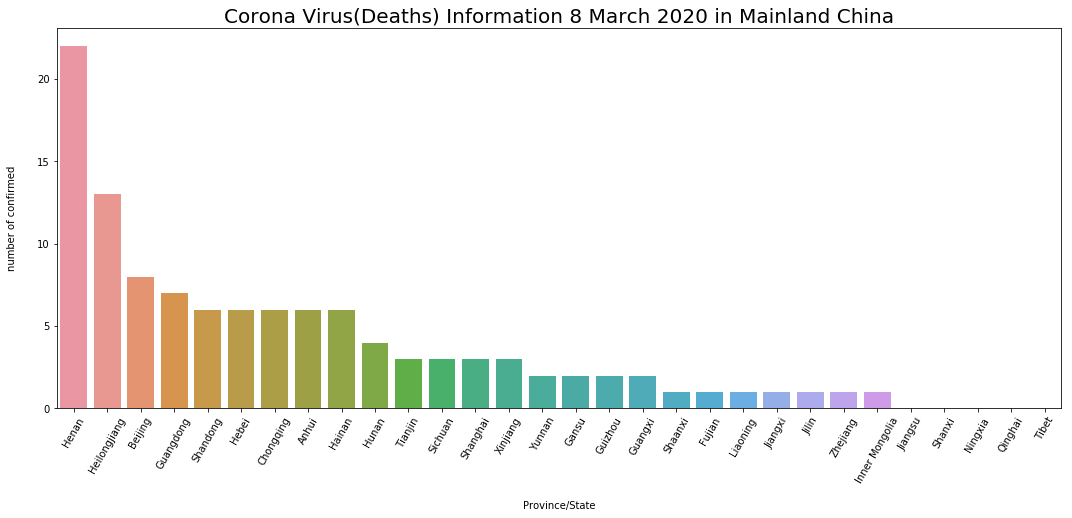

In [31]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Deaths"  ,
            data = corona_data_mainland_china_death_df[corona_data_mainland_china_death_df["Province/State"] != "Hubei"].sort_values(by = "Deaths" , ascending = False) )
plt.title('Corona Virus(Deaths) Information 8 March 2020 in Mainland China', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('08-03-2020/image4.png')
plt.savefig('08-03-2020/image4.pdf')

17 - Show a figure regarding how many people were recovered from Corona Virus in Mainland China

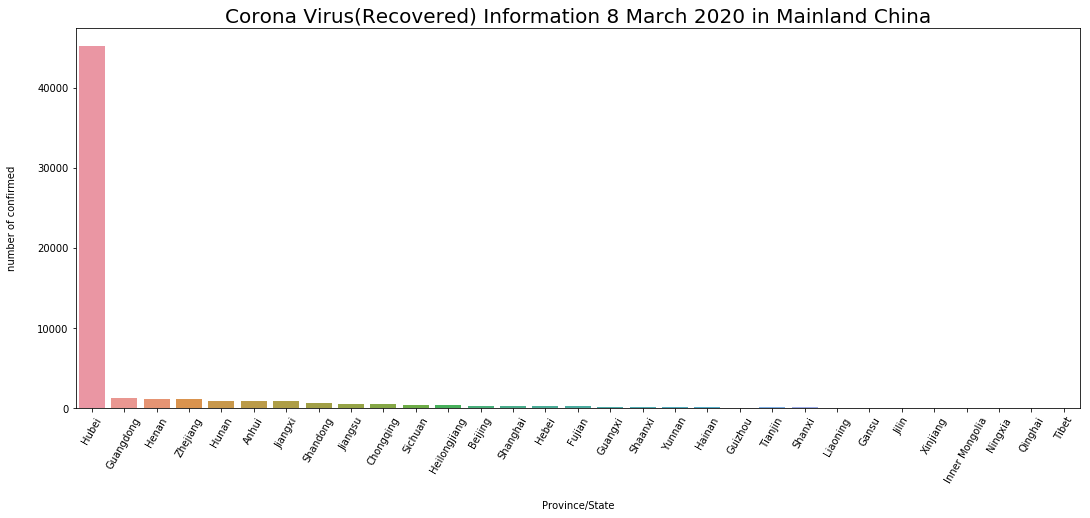

In [32]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Recovered" ,data = corona_data_mainland_china_rocovered_df )
plt.title('Corona Virus(Recovered) Information 8 March 2020 in Mainland China', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('08-03-2020/image5.png')
plt.savefig('08-03-2020/image5.pdf')

18 - Because the number of recovered people in the city of Hubei are extraordinary in the previos figure shown above, Show a figure regaring how many people were recovered from Corona Virus in Mainland China except for the city of Hubei

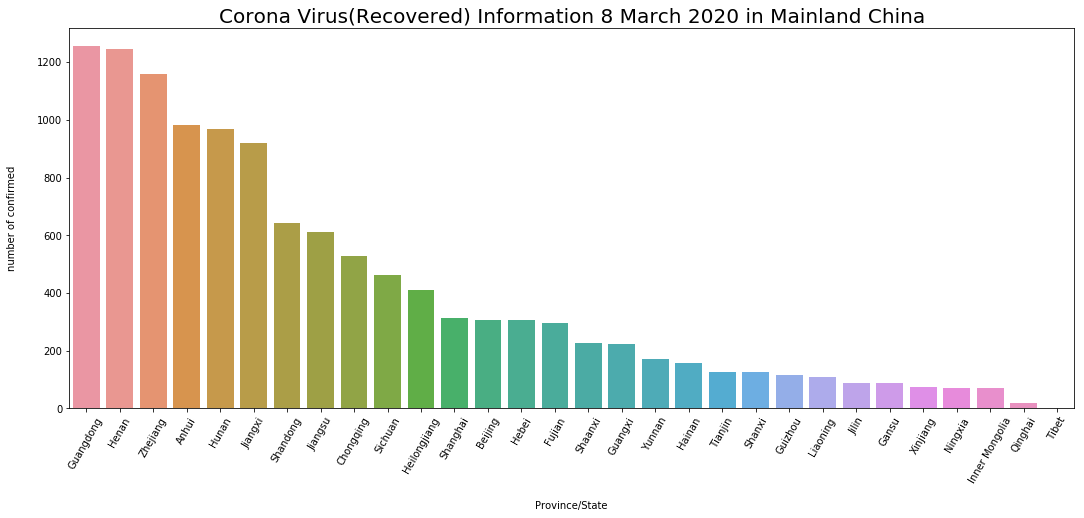

In [33]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Recovered" ,data = corona_data_mainland_china_rocovered_df[corona_data_mainland_china_rocovered_df["Province/State"] != "Hubei"].sort_values(by = "Recovered" , ascending = False) )
plt.title('Corona Virus(Recovered) Information 8 March 2020 in Mainland China', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('08-03-2020/image6.png')
plt.savefig('08-03-2020/image6.pdf')

19 - Define a dataframe based on showing all values related with outside of Mainland China

In [34]:
corona_data_mainland_other_regions_df = corona_data_df[corona_data_df["Country/Region"] != "Mainland China"]

20 - Drop null values from dataframe whose name is corona_data_mainland_other_regions_df and put other values into corona_data_mainland_other_regions_province_df dataframe

In [35]:
corona_data_mainland_other_regions_province_df = corona_data_mainland_other_regions_df.dropna() 

21 - Show values of corona_data_mainland_other_regions_province_df dataframe 

In [36]:
corona_data_mainland_other_regions_province_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
13,Diamond Princess cruise ship,Others,2020-03-06T01:29:39,696,6,40,35.4437,139.6380
40,Hong Kong,Hong Kong,2020-03-08T14:43:03,114,3,58,22.3000,114.2000
45,"King County, WA",US,2020-03-08T20:23:09,83,17,1,47.5480,-121.9836
46,"Westchester County, NY",US,2020-03-08T18:03:07,83,0,0,41.1220,-73.7949
56,Taiwan,Taiwan,2020-03-08T03:13:13,45,1,13,23.7000,121.0000
57,Unassigned Location (From Diamond Princess),US,2020-03-02T19:53:03,45,0,0,35.4437,139.6380
61,New South Wales,Australia,2020-03-08T05:13:07,38,3,4,-33.8688,151.2093
62,"Santa Clara County, CA",US,2020-03-08T21:23:03,38,0,1,37.3541,-121.9552
67,"Snohomish County, WA",US,2020-03-08T21:43:03,31,1,0,48.0330,-121.8339
70,"Toronto, ON",Canada,2020-03-08T21:33:02,28,0,3,43.6532,-79.3832


22 - Define dataset deriving from values at Country/Region with its counts from corona_data_mainland_other_regions_province_df dataframe

In [37]:
corona_countries = pd.value_counts(corona_data_mainland_other_regions_province_df["Country/Region"])

23 - Reset index of corona_countries

In [38]:
corona_countries = pd.DataFrame(data=corona_countries).reset_index()

24 - Show values of corona_countries

In [39]:
corona_countries

,index,Country/Region
0,US,106
1,Australia,8
2,Canada,6
3,Macau,1
4,Hong Kong,1
5,Taiwan,1
6,Others,1


25 - Show a figure based on the count of each Country/Region as Some Developed Countries except for Mainland China

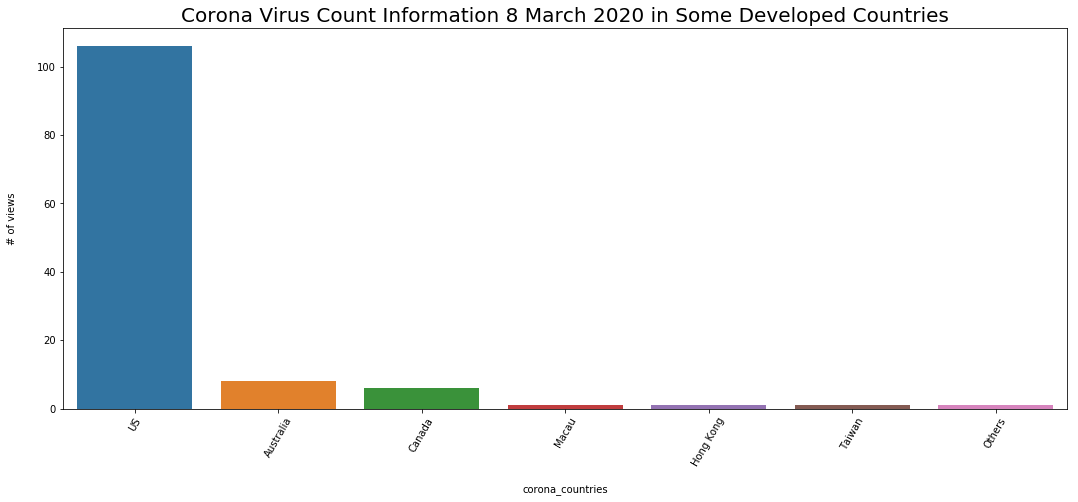

In [40]:
plt.figure(figsize=(18,7))
sns.barplot(x="index", y="Country/Region" ,data = corona_countries )
plt.title('Corona Virus Count Information 8 March 2020 in Some Developed Countries', fontsize=20, y=1)
plt.xlabel('corona_countries', labelpad=16)
plt.ylabel('# of views', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('08-03-2020/image7.png')
plt.savefig('08-03-2020/image7.pdf')

26 - Define a dataframe based on showing all values related with US

In [41]:
corona_data_mainland_other_regions_US_df = corona_data_mainland_other_regions_province_df[corona_data_mainland_other_regions_province_df["Country/Region"] == "US"]

27 - Show values from corona_data_mainland_other_regions_US_df dataframe

In [42]:
corona_data_mainland_other_regions_US_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
45,"King County, WA",US,2020-03-08T20:23:09,83,17,1,47.5480,-121.9836
46,"Westchester County, NY",US,2020-03-08T18:03:07,83,0,0,41.1220,-73.7949
57,Unassigned Location (From Diamond Princess),US,2020-03-02T19:53:03,45,0,0,35.4437,139.6380
62,"Santa Clara County, CA",US,2020-03-08T21:23:03,38,0,1,37.3541,-121.9552
67,"Snohomish County, WA",US,2020-03-08T21:43:03,31,1,0,48.0330,-121.8339
75,Grand Princess Cruise Ship,US,2020-03-07T01:33:02,21,0,0,37.6489,-122.6655
87,"Los Angeles, CA",US,2020-03-08T01:13:48,14,0,0,34.0522,-118.2437
91,"Contra Costa County, CA",US,2020-03-08T21:43:03,12,0,0,37.8534,-121.9018
92,"New York County, NY",US,2020-03-08T04:13:22,12,0,0,40.7128,-74.0060
100,"San Francisco County, CA",US,2020-03-08T01:23:12,9,0,0,37.7749,-122.4194


27 - Get values from Province/State,Confirmed,Deaths,Recovered of corona_data_mainland_other_regions_US_df dataframe

In [43]:
corona_data_mainland_other_regions_US_df = corona_data_mainland_other_regions_US_df[["Province/State","Confirmed","Deaths","Recovered"]]

28 - Show values of corona_data_mainland_other_regions_US_df

In [44]:
corona_data_mainland_other_regions_US_df

,Province/State,Confirmed,Deaths,Recovered
45,"King County, WA",83,17,1
46,"Westchester County, NY",83,0,0
57,Unassigned Location (From Diamond Princess),45,0,0
62,"Santa Clara County, CA",38,0,1
67,"Snohomish County, WA",31,1,0
75,Grand Princess Cruise Ship,21,0,0
87,"Los Angeles, CA",14,0,0
91,"Contra Costa County, CA",12,0,0
92,"New York County, NY",12,0,0
100,"San Francisco County, CA",9,0,0


29 - Show a figure regarding how many people have been confirmed from Corona Virus in US

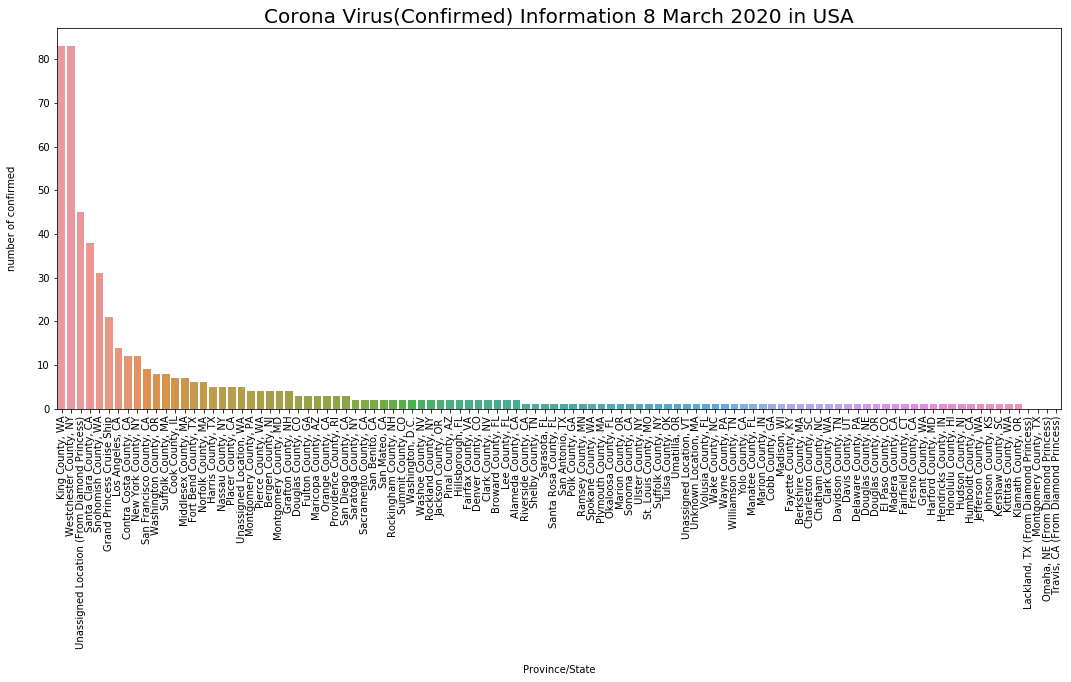

In [45]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Confirmed" ,data = corona_data_mainland_other_regions_US_df.sort_values(by = "Confirmed" , ascending = False) )
plt.title('Corona Virus(Confirmed) Information 8 March 2020 in USA', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image8.png')
plt.savefig('08-03-2020/image8.pdf')

30 - Show a figure regarding how many people were dead from Corona Virus in US

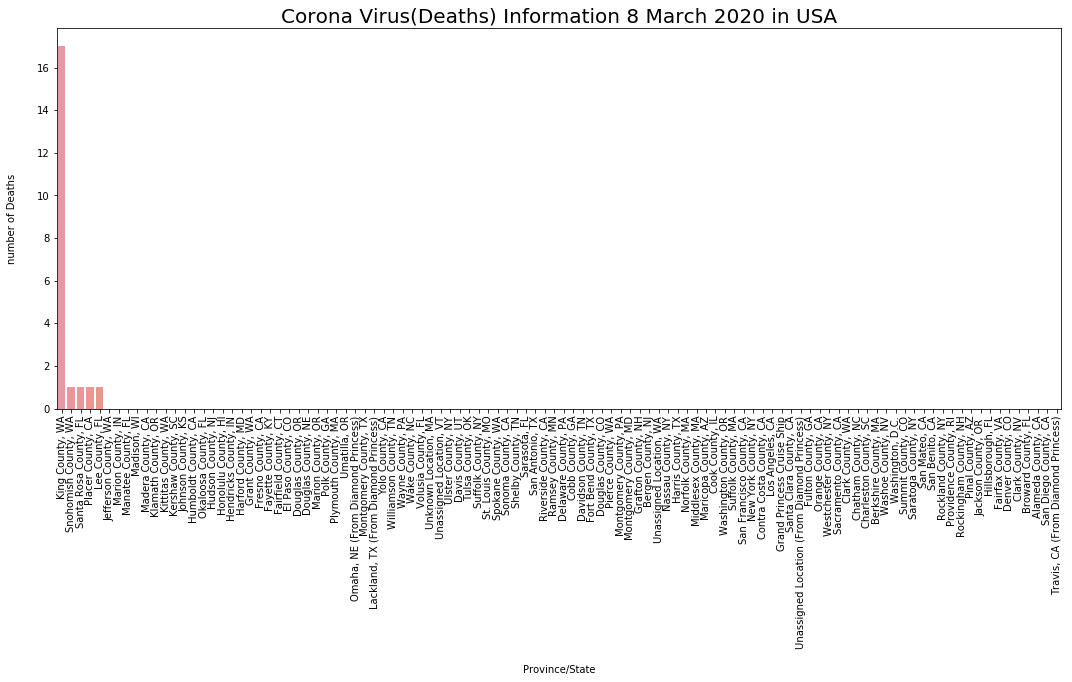

In [46]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Deaths" ,data = corona_data_mainland_other_regions_US_df.sort_values(by = "Deaths" , ascending = False) )
plt.title('Corona Virus(Deaths) Information 8 March 2020 in USA', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Deaths', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image9.png')
plt.savefig('08-03-2020/image9.pdf')

31 - Show a figure regarding how many people were recovered from Corona Virus in US

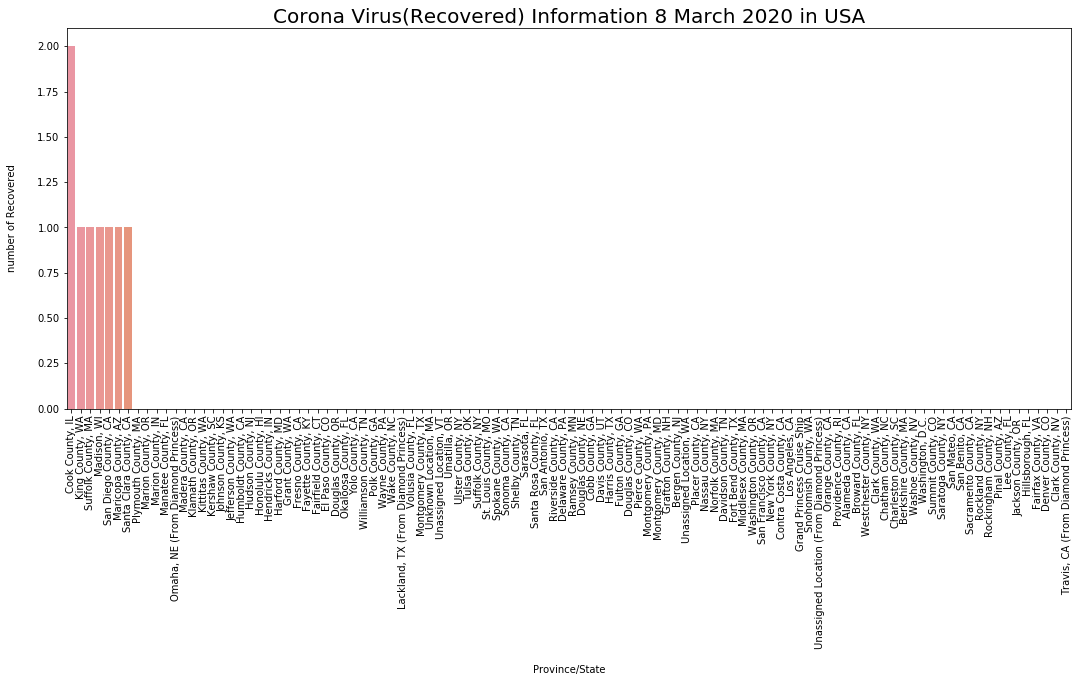

In [47]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Recovered" ,data = corona_data_mainland_other_regions_US_df.sort_values(by = "Recovered" , ascending = False) )
plt.title('Corona Virus(Recovered) Information 8 March 2020 in USA', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Recovered', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image10.png')
plt.savefig('08-03-2020/image10.pdf')

32 - Define a dataframe based on showing all values related with Australia

In [48]:
corona_data_mainland_other_regions_Australia_df = corona_data_mainland_other_regions_province_df[corona_data_mainland_other_regions_province_df["Country/Region"] == "Australia"]

33 - Show values of corona_data_mainland_other_regions_Australia_df dataframe

In [49]:
corona_data_mainland_other_regions_Australia_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
61,New South Wales,Australia,2020-03-08T05:13:07,38,3,4,-33.8688,151.2093
83,Queensland,Australia,2020-03-08T05:43:04,15,0,8,-28.0167,153.4000
93,Victoria,Australia,2020-03-07T02:03:30,11,0,7,-37.8136,144.9631
104,South Australia,Australia,2020-03-06T04:23:08,7,0,2,-34.9285,138.6007
133,Western Australia,Australia,2020-03-05T17:13:35,3,1,0,-31.9505,115.8605
149,Tasmania,Australia,2020-03-08T05:43:04,2,0,0,-41.4545,145.9707
249,From Diamond Princess,Australia,2020-02-29T02:03:10,0,0,0,35.4437,139.6380
250,Northern Territory,Australia,2020-03-06T04:33:03,0,0,0,-12.4634,130.8456


34 - Get values from Province/State,Confirmed,Deaths,Recovered of corona_data_mainland_other_regions_Australia_df dataframe

In [50]:
corona_data_mainland_other_regions_Australia_df = corona_data_mainland_other_regions_Australia_df[["Province/State","Confirmed","Deaths","Recovered"]]

35 - Show values of corona_data_mainland_other_regions_Australia_df

In [51]:
corona_data_mainland_other_regions_Australia_df

,Province/State,Confirmed,Deaths,Recovered
61,New South Wales,38,3,4
83,Queensland,15,0,8
93,Victoria,11,0,7
104,South Australia,7,0,2
133,Western Australia,3,1,0
149,Tasmania,2,0,0
249,From Diamond Princess,0,0,0
250,Northern Territory,0,0,0


36 - Show a figure regarding how many people have been confirmed from Corona Virus in Australia

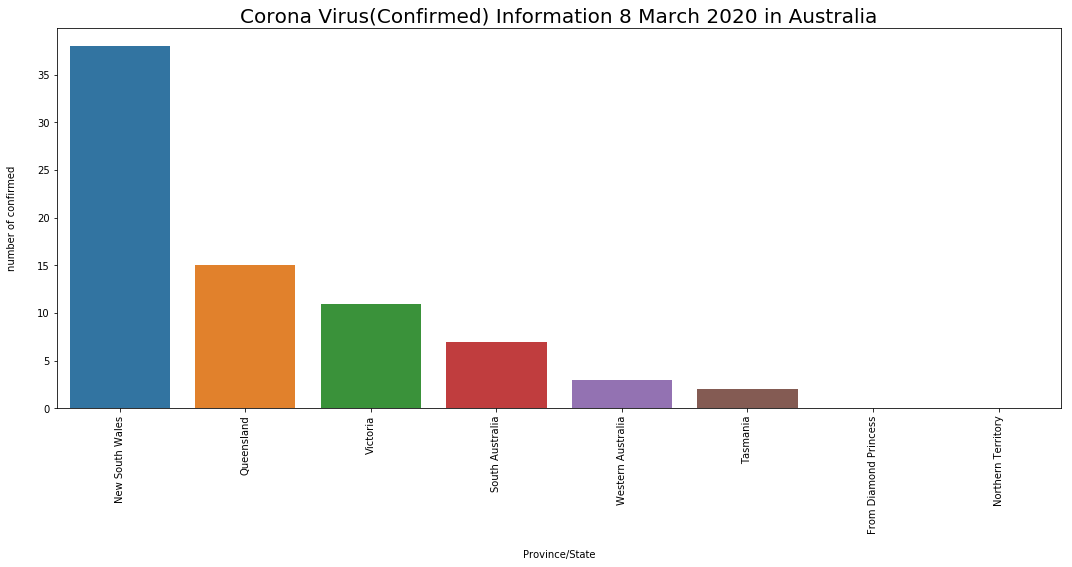

In [52]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Confirmed" ,data = corona_data_mainland_other_regions_Australia_df.sort_values(by = "Confirmed" , ascending = False) )
plt.title('Corona Virus(Confirmed) Information 8 March 2020 in Australia', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image11.png')
plt.savefig('08-03-2020/image11.pdf')

37 - Show a figure regarding how many people were dead from Corona Virus in Australia

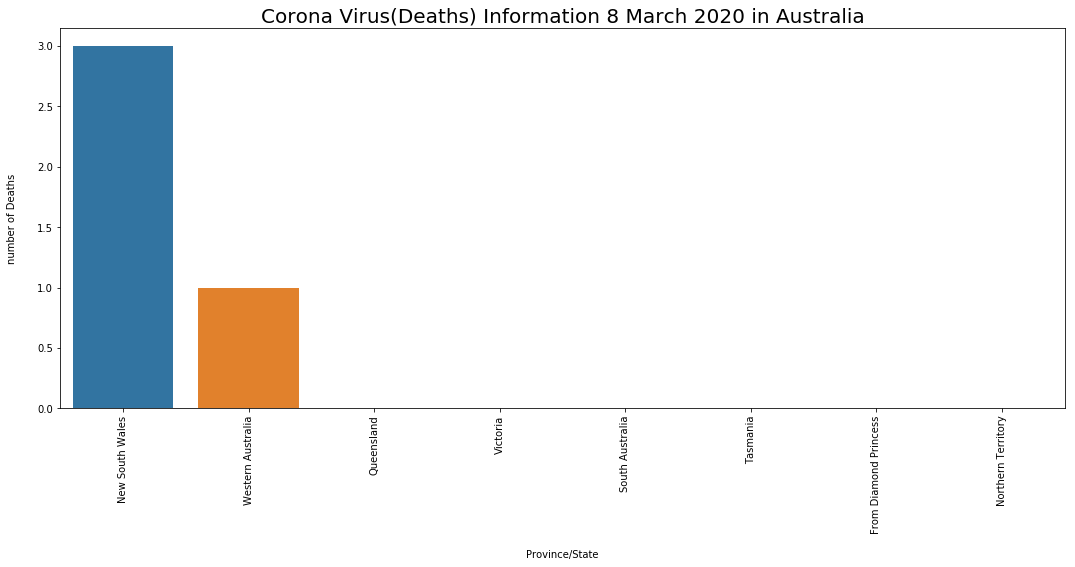

In [53]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Deaths" ,data = corona_data_mainland_other_regions_Australia_df.sort_values(by = "Deaths" , ascending = False) )
plt.title('Corona Virus(Deaths) Information 8 March 2020 in Australia', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Deaths', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image12.png')
plt.savefig('08-03-2020/image12.pdf')

38 - Show a figure regarding how many people were recovered from Corona Virus in Australia

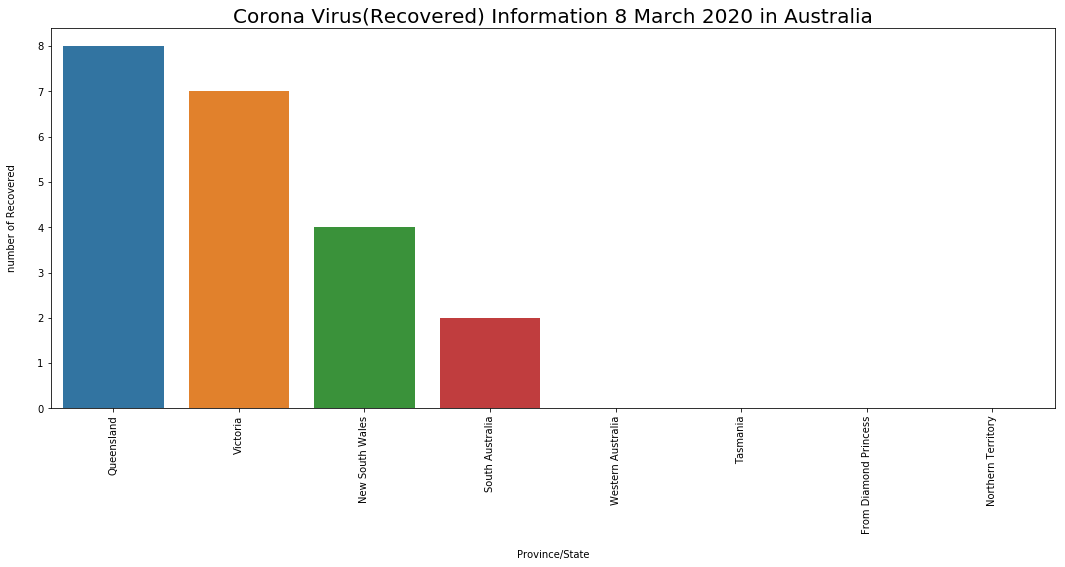

In [54]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Recovered" ,data = corona_data_mainland_other_regions_Australia_df.sort_values(by = "Recovered" , ascending = False) )
plt.title('Corona Virus(Recovered) Information 8 March 2020 in Australia', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Recovered', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image13.png')
plt.savefig('08-03-2020/image13.pdf')

39 - Define a dataframe based on showing all values related with Canada

In [55]:
corona_data_mainland_other_regions_Canada_df = corona_data_mainland_other_regions_province_df[corona_data_mainland_other_regions_province_df["Country/Region"] == "Canada"]

40 - Show values of corona_data_mainland_other_regions_Canada_df dataframe

In [56]:
corona_data_mainland_other_regions_Canada_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
70,"Toronto, ON",Canada,2020-03-08T21:33:02,28,0,3,43.6532,-79.3832
71,British Columbia,Canada,2020-03-08T05:13:07,27,0,4,49.2827,-123.1207
125,"Montreal, QC",Canada,2020-03-08T16:03:05,4,0,0,45.5017,-73.5673
136,"Edmonton, Alberta",Canada,2020-03-08T16:23:07,3,0,0,53.5461,-113.4938
178,"Calgary, Alberta",Canada,2020-03-06T13:13:34,1,0,0,51.0447,-114.0719
179,"London, ON",Canada,2020-02-12T18:53:03,1,0,1,42.9849,-81.2453


41 - Get values from Province/State,Confirmed,Deaths,Recovered of corona_data_mainland_other_regions_Canada_df dataframe

In [57]:
corona_data_mainland_other_regions_Canada_df = corona_data_mainland_other_regions_Canada_df[["Province/State","Confirmed","Deaths","Recovered"]]

42 - Show values of corona_data_mainland_other_regions_Canada_df dataframe

In [58]:
corona_data_mainland_other_regions_Canada_df

,Province/State,Confirmed,Deaths,Recovered
70,"Toronto, ON",28,0,3
71,British Columbia,27,0,4
125,"Montreal, QC",4,0,0
136,"Edmonton, Alberta",3,0,0
178,"Calgary, Alberta",1,0,0
179,"London, ON",1,0,1


43 - Show a figure regarding how many people have been confirmed from Corona Virus in Canada

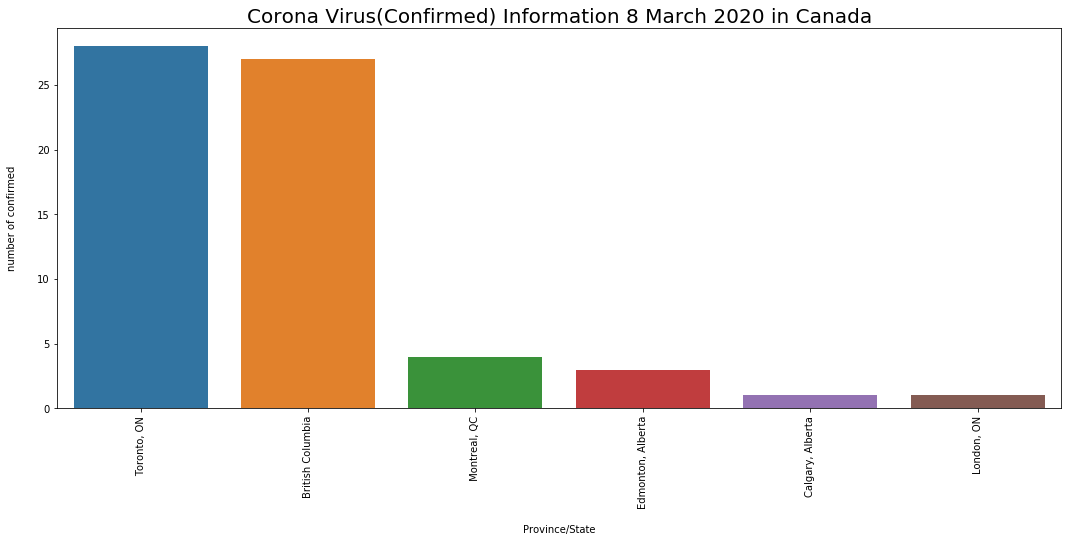

In [59]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Confirmed" ,data = corona_data_mainland_other_regions_Canada_df.sort_values(by = "Confirmed" , ascending = False) )
plt.title('Corona Virus(Confirmed) Information 8 March 2020 in Canada', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image14.png')
plt.savefig('08-03-2020/image14.pdf')

44 - Show a figure regarding how many people were dead from Corona Virus in Canada

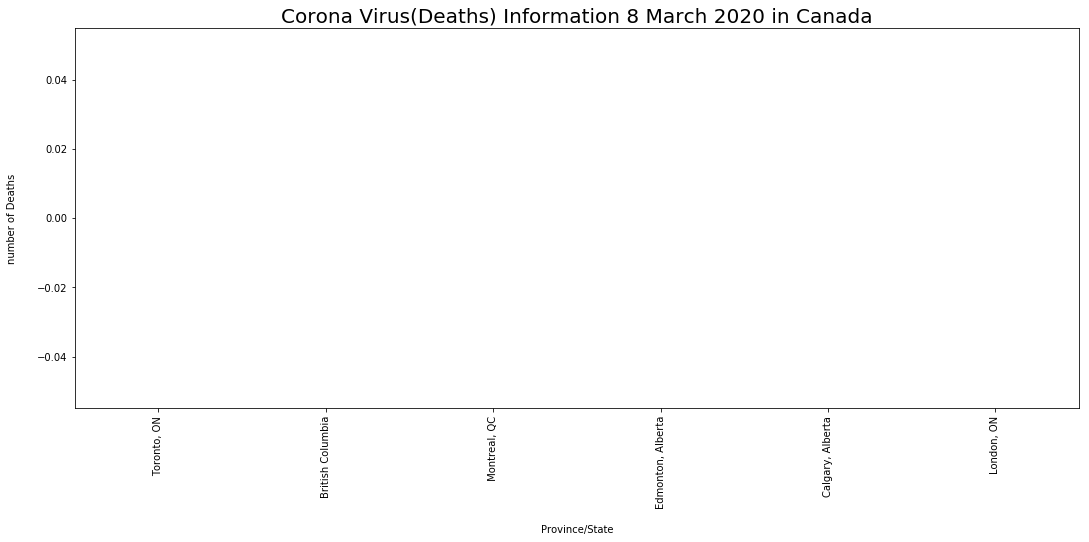

In [60]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Deaths" ,data = corona_data_mainland_other_regions_Canada_df.sort_values(by = "Deaths" , ascending = False) )
plt.title('Corona Virus(Deaths) Information 8 March 2020 in Canada', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Deaths', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image15.png')
plt.savefig('08-03-2020/image15.pdf')

45 - Show a figure regarding how many people were recovered from Corona Virus in Canada

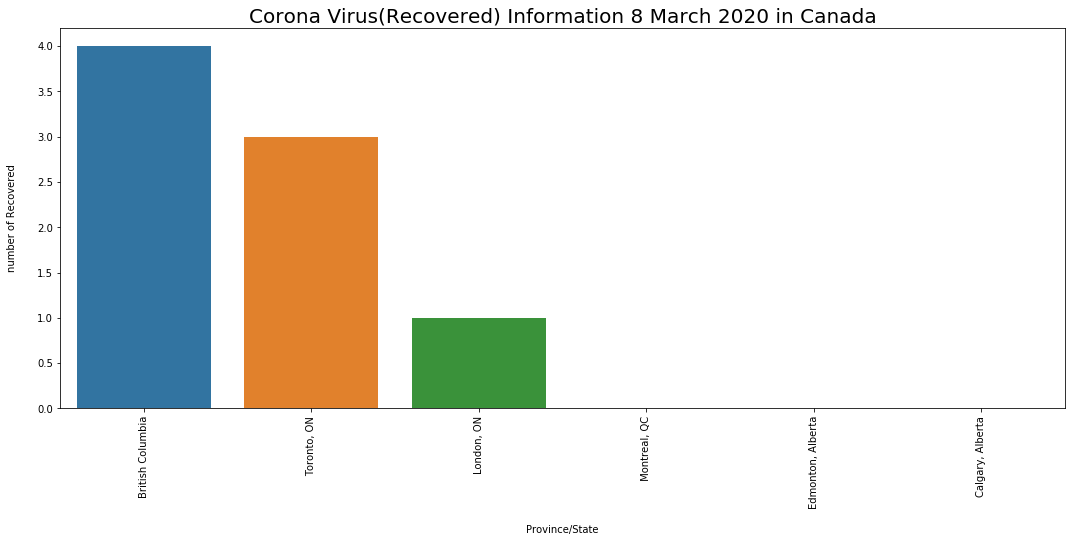

In [61]:
plt.figure(figsize=(18,7))
sns.barplot(x="Province/State", y="Recovered" ,data = corona_data_mainland_other_regions_Canada_df.sort_values(by = "Recovered" , ascending = False) )
plt.title('Corona Virus(Recovered) Information 8 March 2020 in Canada', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Recovered', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image16.png')
plt.savefig('08-03-2020/image16.pdf')

46 - Define a dataframe based on showing all values related with the rest of countries

In [62]:
corona_data_mainland_other_regions_no_province_df = corona_data_mainland_other_regions_df[corona_data_mainland_other_regions_df["Province/State"].isna()]

47 - Drop Province/State cloumn from corona_data_mainland_other_regions_no_province_df

In [63]:
corona_data_mainland_other_regions_no_province_df.drop("Province/State", axis=1, inplace=True)

C:\Users\Noyan\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


48 - Show values of corona_data_mainland_other_regions_no_province_df

In [64]:
corona_data_mainland_other_regions_no_province_df

,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
1,Italy,2020-03-08T18:03:04,7375,366,622,43.0000,12.0000
2,South Korea,2020-03-08T12:53:03,7314,50,118,36.0000,128.0000
3,Iran,2020-03-08T11:03:30,6566,194,2134,32.0000,53.0000
7,France,2020-03-08T18:03:04,1126,19,12,47.0000,2.0000
8,Germany,2020-03-08T21:03:03,1040,0,18,51.0000,9.0000
14,Spain,2020-03-08T20:33:02,673,17,30,40.0000,-4.0000
18,Japan,2020-03-08T14:53:11,502,6,76,36.0000,138.0000
22,Switzerland,2020-03-08T17:23:07,337,2,3,46.8182,8.2275
25,UK,2020-03-08T22:03:10,273,3,18,55.0000,-3.0000
26,Netherlands,2020-03-08T13:43:02,265,3,0,52.1326,5.2913


49 - Get values from Province/State,Confirmed,Deaths,Recovered of corona_data_mainland_other_regions_no_province_df dataframe

In [65]:
corona_data_mainland_other_regions_no_province_df = corona_data_mainland_other_regions_no_province_df[["Country/Region","Confirmed","Deaths","Recovered"]]

50 - Show values of corona_data_mainland_other_regions_no_province_df

In [66]:
corona_data_mainland_other_regions_no_province_df

,Country/Region,Confirmed,Deaths,Recovered
1,Italy,7375,366,622
2,South Korea,7314,50,118
3,Iran,6566,194,2134
7,France,1126,19,12
8,Germany,1040,0,18
14,Spain,673,17,30
18,Japan,502,6,76
22,Switzerland,337,2,3
25,UK,273,3,18
26,Netherlands,265,3,0


51 - Show a figure regarding how many people have been confirmed from Corona Virus in the rest of world

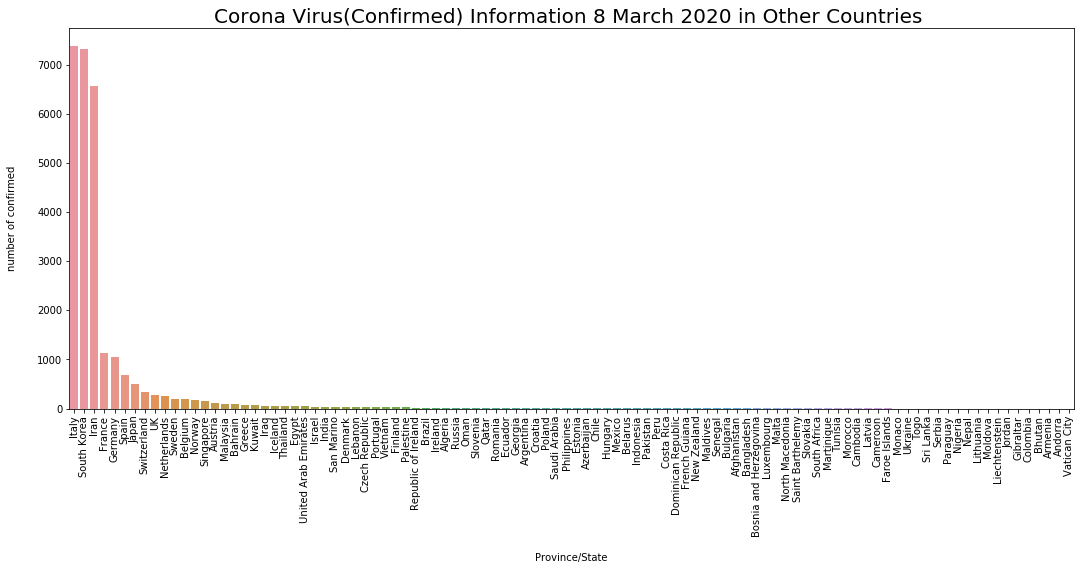

In [67]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Confirmed" ,data = corona_data_mainland_other_regions_no_province_df.sort_values(by = "Confirmed" , ascending = False) )
plt.title('Corona Virus(Confirmed) Information 8 March 2020 in Other Countries ', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image17.png')
plt.savefig('08-03-2020/image17.pdf')

52 - Show a figure regarding how many people were dead from Corona Virus in the rest of world

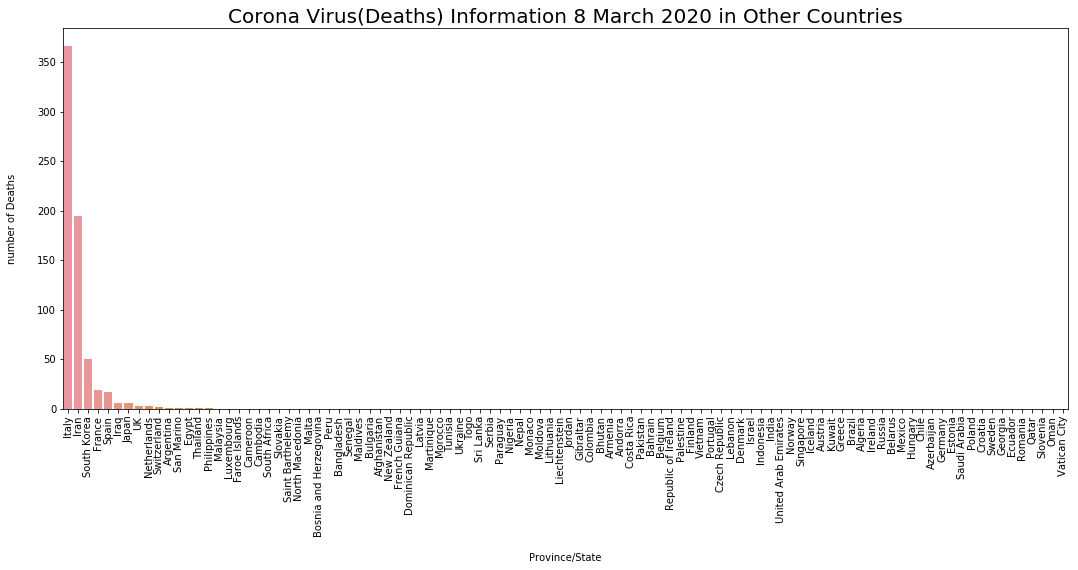

In [68]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Deaths" ,data = corona_data_mainland_other_regions_no_province_df.sort_values(by = "Deaths" , ascending = False) )
plt.title('Corona Virus(Deaths) Information 8 March 2020 in Other Countries', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Deaths', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image18.png')
plt.savefig('08-03-2020/image18.pdf')

53 - Show a figure regarding how many people were recovered from Corona Virus in the rest of world

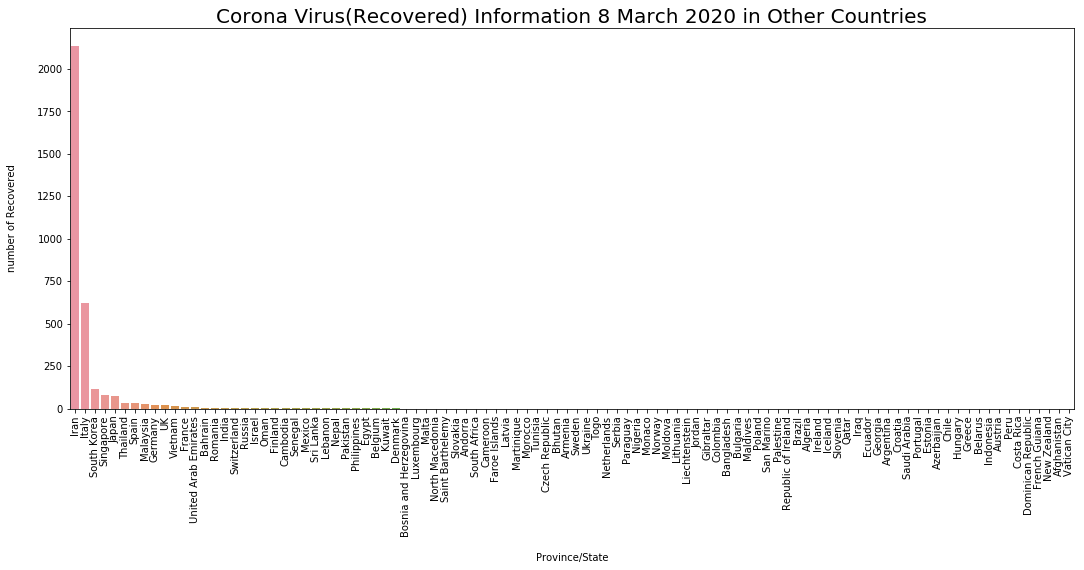

In [69]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Recovered" ,data = corona_data_mainland_other_regions_no_province_df.sort_values(by = "Recovered" , ascending = False) )
plt.title('Corona Virus(Recovered) Information 8 March 2020 in Other Countries', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of Recovered', labelpad=20)
plt.xticks(rotation=90);
plt.savefig('08-03-2020/image19.png')
plt.savefig('08-03-2020/image19.pdf')

### Conclusion based on inferring from the dataset

1- In Mainland China, Corona virus is still active to affect people in bad way. While most people were dead in the city of Hubei, the dead level of others are relative low in the other parts of Mainland China.

2- Most people dwelling in Mainland China continue to gain immunity aganist Corona virus but people confirmed Corona virus and peope who dead from it aren't decreasing 

3- Expect for Mainland China, Corona virus is getting more and more spreading all over the world.

4- The contient of Eurupe, North America and Australia and some countries in Asia like Iran and South Korea are badly affected from Corona Virus rather than other parts of world.   

5- In developed countries, while there are people confirmed, recovered and dead from Corona Virus in both America and Australia, there is no dead people in Canada. However, the number of people confirmed and dead in Canada is still active.

6- Iran is Surprisinglythe second country to affect Corona Virus in the bad way after Mainland China although mneighborhood countries of Mainland China are supposed to spread Corona Virus actively and effectively according to the point of most people. 
